# NearestTime

Demonstrate `synoptic.services.NearestTime`

This is very similar to the Latest service, except you can specify the date/time you want the closest time to.

In [2]:
from synoptic import NearestTime

import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [3]:
df = NearestTime(
    attime=datetime(2024, 1, 1),
    within=timedelta(hours=1),
    bbox=[-120, 40, -119, 41],
    showemptystations=True,
    vars="air_temp",
    units="english",
).df()
df

🚚💨 Speedy delivery from Synoptic's nearesttime service.
📦 Received data from 12 stations (1.32 seconds).


stid,variable,sensor_index,is_derived,value,date_time,units,id,name,elevation,latitude,longitude,mnet_id,state,timezone,elev_dem,period_of_record_start,period_of_record_end,qc_flagged,is_restricted,restricted_metadata,is_active
str,str,u32,bool,f64,"datetime[μs, UTC]",str,u32,str,f64,f64,f64,u32,str,str,f64,"datetime[μs, UTC]","datetime[μs, UTC]",bool,bool,bool,bool
"""BLUN2""","""air_temp""",1,false,44.0,2023-12-31 23:37:00 UTC,"""Fahrenheit""",2169,"""BLUEWING MOUNTAIN""",4570.0,40.50147,-119.12161,2,"""NV""","""America/Los_Angeles""",4655.5,1998-07-28 00:00:00 UTC,2024-12-19 05:37:00 UTC,false,false,false,true
"""BUFN2""","""air_temp""",1,false,44.0,2023-12-31 23:59:00 UTC,"""Fahrenheit""",2171,"""BUFFALO CREEK""",3940.0,40.58058,-119.78881,2,"""NV""","""America/Los_Angeles""",3917.3,1998-07-28 00:00:00 UTC,2024-12-19 05:59:00 UTC,false,false,false,true
"""D1623""",null,null,null,null,null,null,24903,"""DW1623 Gerlach""",3947.0,40.65133,-119.35517,65,"""NV""","""America/Los_Angeles""",3950.1,2008-11-05 00:00:00 UTC,2012-11-22 12:44:00 UTC,null,false,false,false
"""UP973""",null,null,null,null,null,null,35321,"""PHIL""",3998.0,40.62174,-119.41384,64,"""NV""","""America/Los_Angeles""",3930.4,2013-01-04 00:00:00 UTC,2024-12-19 05:40:00 UTC,null,false,false,true
"""UP974""",null,null,null,null,null,null,35322,"""TREGO""",4005.0,40.78996,-119.07088,64,"""NV""","""America/Los_Angeles""",3937.0,2013-01-04 00:00:00 UTC,2024-12-19 04:29:00 UTC,false,false,false,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""UP999""","""air_temp""",1,false,45.0,2023-12-31 23:21:00 UTC,"""Fahrenheit""",35347,"""REYNRD""",3880.0,40.53186,-119.61354,64,"""NV""","""America/Los_Angeles""",3874.7,2013-01-04 00:00:00 UTC,2024-12-19 05:04:00 UTC,false,false,false,true
"""NHUA""","""air_temp""",1,false,43.21,2024-01-01 00:00:00 UTC,"""Fahrenheit""",41973,"""Hualapai Flat""",4055.0,40.90111,-119.33306,62,"""NV""","""America/Los_Angeles""",4081.4,2013-12-19 00:00:00 UTC,2024-01-01 07:20:00 UTC,false,false,false,false
"""COOPGERN2""",null,null,null,null,null,null,57082,"""GERLACH""",3954.0,40.6517,-119.3579,73,"""NV""","""America/Los_Angeles""",3927.2,2016-07-18 18:18:00 UTC,2019-05-17 16:00:00 UTC,null,false,false,false


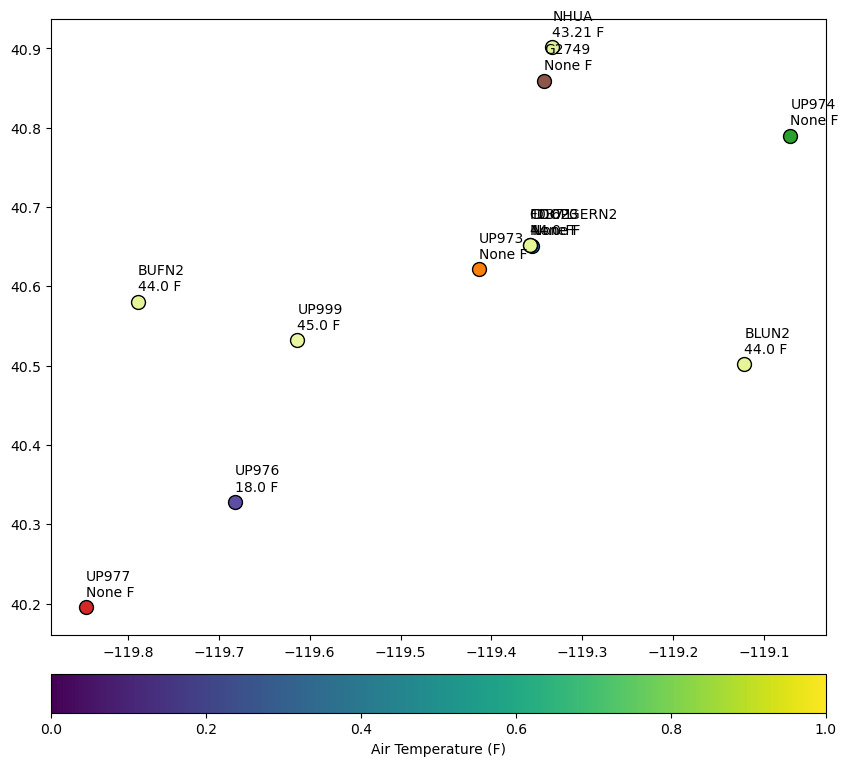

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for i in df.iter_rows(named=True):
    ax.text(
        i["longitude"],
        i["latitude"] + 0.01,
        f'{i["stid"]}\n{i["value"]} F',
        va="bottom",
        ha="left",
    )
    if i["value"] is None:
        art = ax.scatter(
            i["longitude"],
            i["latitude"],
            color=None,
            ec="k",
            s=100,
        )
    else:
        art = ax.scatter(
            i["longitude"],
            i["latitude"],
            c=i["value"],
            ec="k",
            cmap="Spectral_r",
            vmin=20,
            vmax=80,
            s=100,
        )
plt.colorbar(art, ax=ax, location="bottom", pad=0.05, label="Air Temperature (F)")